# 이미지 데이터 전처리 및 배치 제너레이터 생성

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
BATCH_SIZE = 16
image_height = 500
image_width = 500
# 폴더 구조로 카테고리를 분류하기 위해
train_dir = '../catdog/train'
test_dir = '../catdog/test'


train = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    validation_split = 0.2   # 검증 데이터 분할
    )
    
train_generator = train.flow_from_directory(train_dir,
                                            target_size = (image_height, image_width),
                                            color_mode = 'rgb',
                                            batch_size=BATCH_SIZE,
                                            seed=1,
                                            shuffle=True,
                                            class_mode="binary",
                                            subset = 'training')   # training

validation_generator = train.flow_from_directory(train_dir,
                                            target_size = (image_height, image_width),
                                            color_mode = 'rgb',
                                            batch_size=BATCH_SIZE,
                                            seed=1,
                                            shuffle=True,
                                            class_mode="binary",
                                            subset = 'validation')   # validation

test = ImageDataGenerator(rescale = 1./255)

test_generator = train.flow_from_directory(train_dir,
                                            target_size = (image_height, image_width),
                                            color_mode = 'rgb',
                                            batch_size=BATCH_SIZE,
                                            seed=1,
                                            shuffle=True,
                                            class_mode="binary")

Found 2945 images belonging to 2 classes.
Found 735 images belonging to 2 classes.
Found 3680 images belonging to 2 classes.


In [13]:
# img, label = next(train_generator)

In [ ]:
# img

In [15]:
# label

array([1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0.],
      dtype=float32)

In [23]:
# 테스트 후 제너레이터를 다시 생성해야합니다.
# 배치를 수행했기에 훈련 데이터가 배치만큼 줄어듭니다.
# for data_batch, labels_batch in train_generator:
#     print('데이터 배치 크기: ', data_batch.shape)
#     print('레이블 배치 크기: ', labels_batch.shape)
#     break

데이터 배치 크기:  (32, 224, 224, 3)
레이블 배치 크기:  (32,)


# 모델 구성

In [3]:
import keras
from tensorflow.keras import layers

Using TensorFlow backend.


In [4]:
inputs = keras.Input(shape=(image_height, image_width, 3))
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation='sigmoid')(x)

model = keras.Model(inputs = inputs, outputs = outputs)

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.summary()

# 모델 훈련

In [5]:
import os
import keras

EPOCHS = 30

callbacks = [
    keras.callbacks.EarlyStopping(
        monitor = 'val_accuracy',
        patience = 4,
    ),
    keras.callbacks.ModelCheckpoint(
        filepath=os.path.join("../학습한 모델들/", "my_conv_try_{epoch:02d}_{val_accuracy:.2f}_{val_loss:.2f}.keras"),
        monitor='val_loss',
        save_best_only=True
    )
]

In [7]:
fit_history = model.fit(train_generator,
                        epochs=EPOCHS,
                        validation_data=validation_generator,
                        callbacks=callbacks)

Epoch 1/30
185/185 [==============================] - 293s 2s/step - loss: 0.6196 - accuracy: 0.6771 - val_loss: 0.6318 - val_accuracy: 0.6776
Epoch 2/30
185/185 [==============================] - 524s 3s/step - loss: 0.6045 - accuracy: 0.6812 - val_loss: 0.6383 - val_accuracy: 0.6463
Epoch 3/30
185/185 [==============================] - 352s 2s/step - loss: 0.5891 - accuracy: 0.6930 - val_loss: 0.6565 - val_accuracy: 0.6871
Epoch 4/30
185/185 [==============================] - 338s 2s/step - loss: 0.5971 - accuracy: 0.6944 - val_loss: 0.5943 - val_accuracy: 0.6844
Epoch 5/30
185/185 [==============================] - 285s 2s/step - loss: 0.5682 - accuracy: 0.7114 - val_loss: 0.5876 - val_accuracy: 0.6844
Epoch 6/30
185/185 [==============================] - 282s 2s/step - loss: 0.5601 - accuracy: 0.7195 - val_loss: 0.5362 - val_accuracy: 0.7116
Epoch 7/30
185/185 [==============================] - 277s 1s/step - loss: 0.5275 - accuracy: 0.7416 - val_loss: 0.5775 - val_accuracy: 0.6884

# 학습 곡선

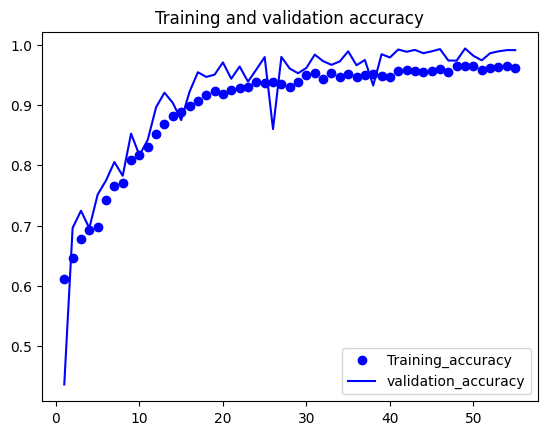

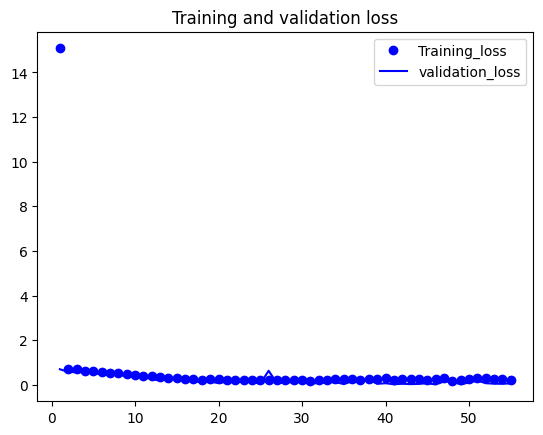

In [18]:
import matplotlib.pyplot as plt

accuracy = fit_history.history["accuracy"]
val_accuracy = fit_history.history["val_accuracy"]
loss = fit_history.history["loss"]
val_loss = fit_history.history["val_loss"]
epochs = range(1, len(accuracy)+1)

plt.plot(epochs, accuracy, "bo", label="Training_accuracy")
plt.plot(epochs, val_accuracy, "b-", label="validation_accuracy")
plt.title("Training and validation accuracy")
plt.legend()

plt.figure()
plt.plot(epochs, loss, "bo", label="Training_loss")
plt.plot(epochs, val_loss, "b-", label="validation_loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

# 모델 평가

In [11]:
test_model = keras.models.load_model('../학습한 모델들/my_conv_try_1_16_0.81_0.42/my_conv_try_1_16_0.81_0.42.keras')
test_loss, test_acc = test_model.evaluate(test_generator)
print(f'테스트 정확도: {test_acc:.3f}')
print(f'테스트 손실: {test_loss:.3f}')

230/230 [==============================] - 186s 807ms/step - loss: 0.3238 - accuracy: 0.8584
테스트 정확도: 0.858
테스트 손실: 0.324


# 데이터 증식 사용하기

In [3]:
import tensorflow as tf
from keras import layers

BATCH_SIZE = 24
IMAGE_HEIGHT = 500
IMAGE_WIDTH = 500

data_augmentation = tf.keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
        layers.experimental.preprocessing.RandomRotation(0.1),
        layers.experimental.preprocessing.RandomTranslation(0.1, 0.1),
        layers.experimental.preprocessing.RandomZoom(0.2)
    ]
)

In [4]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [5]:
TRAIN_DIR = '../catdog/train'
TEST_DIR = '../catdog/test'

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    TRAIN_DIR,
    image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    batch_size=BATCH_SIZE,
    label_mode='binary',
    validation_split=0.2,
    subset="training",
    seed=123
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    TRAIN_DIR,
    image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    batch_size=BATCH_SIZE,
    label_mode='binary',
    validation_split=0.2,
    subset="validation",
    seed=123
)

test_ds = image_dataset_from_directory(
    TEST_DIR,
    image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    batch_size=BATCH_SIZE,
)

Found 3680 files belonging to 2 classes.
Using 2944 files for training.
Found 3680 files belonging to 2 classes.
Using 736 files for validation.
Found 3669 files belonging to 2 classes.


In [6]:
train_ds = train_ds.prefetch(BATCH_SIZE)
val_ds = train_ds.prefetch(BATCH_SIZE)
test_ds = train_ds.prefetch(BATCH_SIZE)

# 이미지 증식과 드롭아웃을 포함한 컨브넷 만들기

In [7]:
import keras
import tensorflow as tf
from keras import layers

In [7]:
inputs = keras.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))
x = data_augmentation(inputs)
x = layers.experimental.preprocessing.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)

model = keras.Model(inputs = inputs, outputs = outputs)

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# 규제를 추가한 컨브넷 훈련

In [8]:
import os
import keras

EPOCHS = 100

callbacks = [
    keras.callbacks.EarlyStopping(
        monitor = 'val_accuracy',
        patience = 6,
    ),
    keras.callbacks.ModelCheckpoint(
        filepath=os.path.join("../학습한 모델들/", "my_conv_try_2_{epoch:02d}_{val_accuracy:.2f}_{val_loss:.2f}.keras"),
        monitor='val_loss',
        save_best_only=True
    )
]

In [ ]:
fit_history = model.fit(train_ds,
                        epochs=EPOCHS,
                        validation_data=val_ds,
                        callbacks=callbacks)

# 학습 곡선

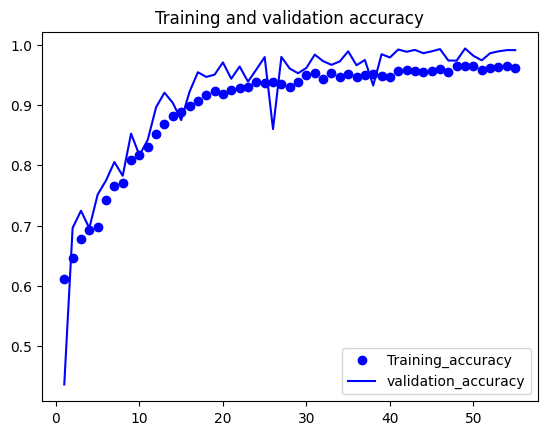

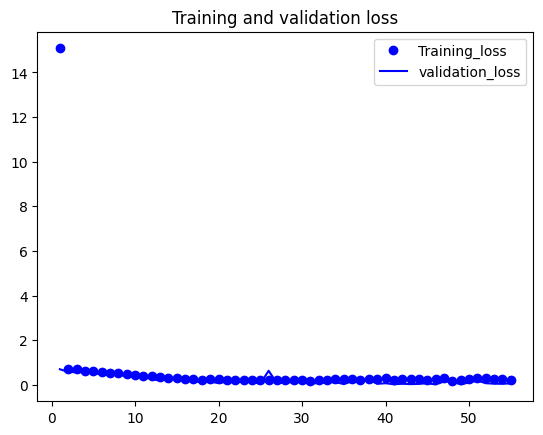

In [19]:
import matplotlib.pyplot as plt

accuracy = fit_history.history["accuracy"]
val_accuracy = fit_history.history["val_accuracy"]
loss = fit_history.history["loss"]
val_loss = fit_history.history["val_loss"]
epochs = range(1, len(accuracy)+1)

plt.plot(epochs, accuracy, "bo", label="Training_accuracy")
plt.plot(epochs, val_accuracy, "b-", label="validation_accuracy")
plt.title("Training and validation accuracy")
plt.legend()

plt.figure()
plt.plot(epochs, loss, "bo", label="Training_loss")
plt.plot(epochs, val_loss, "b-", label="validation_loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

# 모델 평가

In [8]:
test_model = keras.models.load_model('../학습한 모델들/my_conv_try_2_46_0.99_0.02/my_conv_try_2_46_0.99_0.02.keras')
test_loss, test_acc = test_model.evaluate(test_ds)
print(f'테스트 정확도: {test_acc:.3f}')
print(f'테스트 손실: {test_loss:.3f}')

123/123 [==============================] - 24s 147ms/step - loss: 0.0178 - accuracy: 0.9929
테스트 정확도: 0.993
테스트 손실: 0.018
